<a href="https://colab.research.google.com/github/intimanjunath/Decision-trees-and-ensemble/blob/main/Showcase_gbm_classifier_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [4]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Display dataset information
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

Training Samples: 455, Testing Samples: 114


In [6]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=1234)

# Random Forest
rf = RandomForestClassifier(n_estimators=300,
                             max_features=0.1,
                             n_jobs=-1,
                             random_state=1234)

# AdaBoost
base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.1)
ab = AdaBoostClassifier(estimator=base_estim,  # Fixed keyword argument
                        n_estimators=300,
                        learning_rate=0.3,
                        random_state=1234)

# Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=1500,
                                  subsample=0.7,
                                  max_features=0.1,
                                  validation_fraction=0.1,
                                  n_iter_no_change=10,
                                  verbose=0,
                                  random_state=1234)

# XGBoost
xgb = XGBClassifier(n_estimators=1500,
                     tree_method='hist',
                     subsample=0.7,
                     colsample_bytree=0.1,
                     verbose=0,
                     n_jobs=-1,
                     random_state=1234)

# LightGBM
lgbm = LGBMClassifier(n_estimators=1500,
                      feature_fraction=0.1,
                      bagging_fraction=0.7,
                      bagging_freq=1,
                      verbose=-1,
                      n_jobs=-1,
                      random_state=1234)

# CatBoost
cb = CatBoostClassifier(n_estimators=1500,
                        colsample_bylevel=0.1,
                        max_leaves=31,
                        subsample=0.7,
                        verbose=0,
                        thread_count=-1,
                        random_state=1234)

# Histogram Gradient Boosting
hgbm = HistGradientBoostingClassifier(max_iter=1500,
                                       validation_fraction=0.1,
                                       n_iter_no_change=10,
                                       verbose=0,
                                       random_state=1234)

In [7]:
#Test the Updated Implementation
# Store results
results = []

# Models
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "AdaBoost": ab,
    "Gradient Boosting": gbm,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": cb,
    "HistGradientBoosting": hgbm
}

# Train and evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display Results
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:21:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


                  Model  Accuracy  Precision    Recall  F1-Score
0         Decision Tree  0.903509   0.914286  0.927536  0.920863
1         Random Forest  0.912281   0.893333  0.971014  0.930556
2              AdaBoost  0.947368   0.920000  1.000000  0.958333
3     Gradient Boosting  0.921053   0.905405  0.971014  0.937063
4               XGBoost  0.929825   0.896104  1.000000  0.945205
5              LightGBM  0.938596   0.907895  1.000000  0.951724
6              CatBoost  0.929825   0.896104  1.000000  0.945205
7  HistGradientBoosting  0.938596   0.907895  1.000000  0.951724


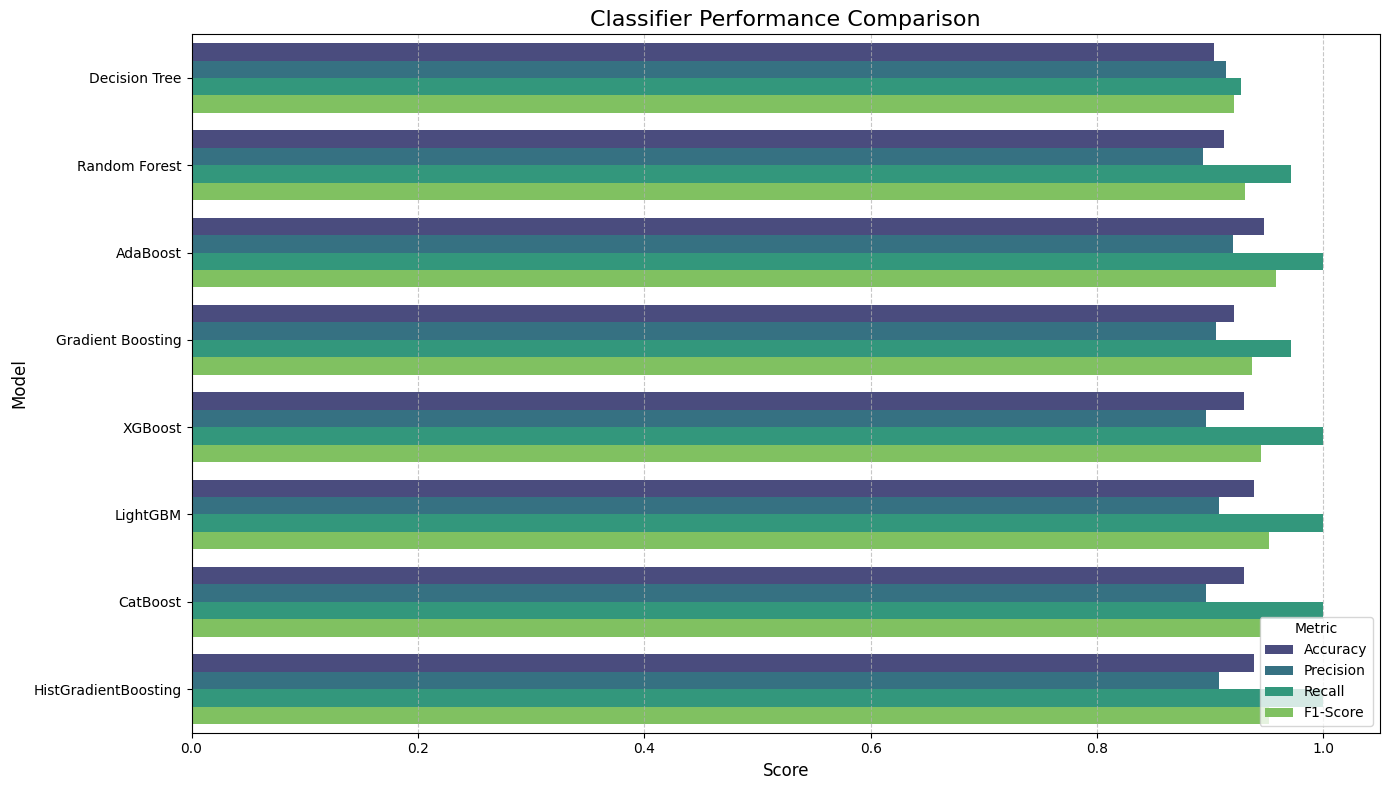

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to make it suitable for Seaborn
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot the scores
plt.figure(figsize=(14, 8))
sns.barplot(data=results_melted, x="Score", y="Model", hue="Metric", palette="viridis")
plt.title("Classifier Performance Comparison", fontsize=16)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.legend(title="Metric", loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()